In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy



In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Create a practice set of random latitude and longitude combinations.
#x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
#y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
#coordinates = zip(x, y)

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
#for coordinate in coordinates:
   # print(coordinate[0], coordinate[1])

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
#Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

mahebourg mu
matamoros mx
portland au
souillac mu
shimoda jp
albany au
bluff nz
vaitupu wf
constitucion mx
nikolskoye ru
mar del plata ar
barentsburg sj
toliary mg
imeni morozova ru
mataura pf
merauke id
mahebourg mu
bredasdorp za
jolo ph
sitka us
valparaiso cl
achinsk ru
llangefni gb
senneterre ca
khatanga ru
ushuaia ar
mataura pf
tual id
kapaa us
flin flon ca
puerto ayora ec
busselton au
mataura pf
saint anthony ca
flin flon ca
barrow us
ushuaia ar
victoria sc
sola vu
rawson ar
sur om
kapaa us
kapaa us
mataura pf
amderma ru
kruisfontein za
new norfolk au
chokurdakh ru
ponta do sol cv
vaitupu wf
kapaa us
rurrenabaque bo
leningradskiy ru
laguna br
bambanglipuro id
ushuaia ar
arraial do cabo br
visby se
taupo nz
rudbar af
mataura pf
vyartsilya ru
yairipok in
lebu cl
sambava mg
kavaratti in
kapaa us
new norfolk au
puerto ayora ec
rikitea pf
cairns au
nizhneyansk ru
jamestown sh
hobart au
punta arenas cl
saiha in
ushuaia ar
kushiro jp
bethel us
egvekinot ru
vaini to
bluff nz
upernavik gl


torbay ca
belushya guba ru
taolanaro mg
ilulissat gl
hobart au
rikitea pf
onega ru
jamestown sh
soe id
fukue jp
mataura pf
tarko-sale ru
ushuaia ar
san angelo us
kununurra au
usinsk ru
dhaka in
ushuaia ar
warqla dz
roseville us
sitka us
bataipora br
busselton au
churapcha ru
sidi qasim ma
rikitea pf
ushuaia ar
port alfred za
kavieng pg
ribeira grande pt
nikolskoye ru
port elizabeth za
bereda so
nioro ml
mackay au
new norfolk au
cap malheureux mu
muisne ec
jalapa mx
georgetown sh
ponta do sol cv
camocim br
avarua ck
benguela ao
la asuncion ve
hilo us
harstad no
vaini to
ushuaia ar
nanortalik gl
albany au
victoria sc
hermanus za
belushya guba ru
hualmay pe
hithadhoo mv
abonnema ng
saleaula ws
qaanaaq gl
arraial do cabo br
busselton au
chokurdakh ru
lindas no
bubaque gw
hermanus za
lasa cn
hilo us
rikitea pf
mataura pf
albany au
talnakh ru
rikitea pf
east london za
bredasdorp za
yellowknife ca
ostrovnoy ru
namatanai pg
shimoda jp
shelburne ca
ushuaia ar
mataura pf
butaritari ki
dikson ru


atuona pf
hobart au
brooks ca
apatou gf
turukhansk ru
bluff nz
thompson ca
dingle ie
yaan cn
evensk ru
belushya guba ru
barrow us
billings us
bonthe sl
hilo us
namatanai pg
rikitea pf
tasiilaq gl
half moon bay us
rikitea pf
ourinhos br
butaritari ki
tilichiki ru
bodden town ky
hilo us
mataura pf
mys shmidta ru
zhigansk ru
bredasdorp za
touros br
faya td
port elizabeth za
ixcatlan mx
dikson ru
mataura pf
albany au
kano ng
ushuaia ar
punta arenas cl
norman wells ca
thompson ca
flinders au
labuhan id
port alfred za
busselton au
katherine au
pimenta bueno br
kasongo cd
port keats au
uwayl sd
hobart au
port elizabeth za
marsh harbour bs
palm coast us
rikitea pf
gizo sb
west bay ky
vila vu
nueva loja ec
kangaatsiaq gl
mar del plata ar
saint-augustin ca
ushuaia ar
jinchengjiang cn
wodonga au
puerto ayora ec
kalmunai lk
illoqqortoormiut gl
san carlos ve
esperance au
diamantino br
belushya guba ru
abha sa
mar del plata ar
kavieng pg
punta arenas cl
moncao br
victoria sc
antalaha mg
ilulissat gl

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=471ec0127349e6575f36b2435d0daa4d


In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
#print("Beginning Data Retrieval")
#print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
#print("-----------------------------")
#print("Data Retrieval Complete      ")
#print("-----------------------------")

Processing Record 1 of Set 1 | mahebourg
Processing Record 2 of Set 1 | matamoros
Processing Record 3 of Set 1 | portland
Processing Record 4 of Set 1 | souillac
Processing Record 5 of Set 1 | shimoda
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 9 of Set 1 | constitucion
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | mar del plata
Processing Record 12 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 13 of Set 1 | toliary
City not found. Skipping...
Processing Record 14 of Set 1 | imeni morozova
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | merauke
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | jolo
Processing Record 19 of Set 1 | sitka
Processing Record 20 of Set 1 | valparaiso
Processing Record 21 of Set 1 | achinsk
Processing Record 22 of Set 1 | llangefni
Processing Rec

Processing Record 41 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 42 of Set 4 | lamar
Processing Record 43 of Set 4 | balti
Processing Record 44 of Set 4 | ngunguru
Processing Record 45 of Set 4 | boda
Processing Record 46 of Set 4 | salta
Processing Record 47 of Set 4 | port elizabeth
Processing Record 48 of Set 4 | katakwi
Processing Record 49 of Set 4 | lorengau
Processing Record 50 of Set 4 | cleethorpes
Processing Record 1 of Set 5 | riyadh
Processing Record 2 of Set 5 | port lincoln
Processing Record 3 of Set 5 | riverton
Processing Record 4 of Set 5 | camacha
Processing Record 5 of Set 5 | saint-philippe
Processing Record 6 of Set 5 | bubaque
Processing Record 7 of Set 5 | manokwari
Processing Record 8 of Set 5 | jalu
Processing Record 9 of Set 5 | det udom
Processing Record 10 of Set 5 | kijang
Processing Record 11 of Set 5 | el balyana
City not found. Skipping...
Processing Record 12 of Set 5 | tigil
Processing Record 13 of Set 5 | sao joao da barra
Proc

Processing Record 34 of Set 8 | shumskiy
Processing Record 35 of Set 8 | cayenne
Processing Record 36 of Set 8 | boguchany
Processing Record 37 of Set 8 | seminole
Processing Record 38 of Set 8 | ormara
Processing Record 39 of Set 8 | san andres
Processing Record 40 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 41 of Set 8 | mwinilunga
Processing Record 42 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 43 of Set 8 | tezu
Processing Record 44 of Set 8 | torrijos
Processing Record 45 of Set 8 | veraval
Processing Record 46 of Set 8 | bakhmach
Processing Record 47 of Set 8 | jacareacanga
Processing Record 48 of Set 8 | comodoro rivadavia
Processing Record 49 of Set 8 | itarema
Processing Record 50 of Set 8 | amahai
Processing Record 1 of Set 9 | otradnoye
Processing Record 2 of Set 9 | kalomo
City not found. Skipping...
Processing Record 3 of Set 9 | bandrele
Processing Record 4 of Set 9 | wagrowiec
Processing Record 5 of Set 9 | antalaha
Process

Processing Record 18 of Set 12 | boras
Processing Record 19 of Set 12 | usvyaty
Processing Record 20 of Set 12 | henties bay
Processing Record 21 of Set 12 | mayskiy
Processing Record 22 of Set 12 | kothi
Processing Record 23 of Set 12 | yinchuan
Processing Record 24 of Set 12 | port moresby
Processing Record 25 of Set 12 | goderich
Processing Record 26 of Set 12 | roros
Processing Record 27 of Set 12 | brooks
Processing Record 28 of Set 12 | apatou
Processing Record 29 of Set 12 | turukhansk
Processing Record 30 of Set 12 | yaan
Processing Record 31 of Set 12 | evensk
Processing Record 32 of Set 12 | billings
Processing Record 33 of Set 12 | bonthe
Processing Record 34 of Set 12 | ourinhos
Processing Record 35 of Set 12 | tilichiki
Processing Record 36 of Set 12 | bodden town
Processing Record 37 of Set 12 | zhigansk
Processing Record 38 of Set 12 | ixcatlan
City not found. Skipping...
Processing Record 39 of Set 12 | kano
Processing Record 40 of Set 12 | flinders
Processing Record 41

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mahebourg,-20.4081,57.7000,68.25,88,98,16.31,MU,2021-07-28 00:11:51
1,Matamoros,25.5333,-103.2500,95.11,25,40,11.50,MX,2021-07-28 00:10:08
2,Portland,45.5234,-122.6762,91.53,40,20,1.01,US,2021-07-28 00:09:07
3,Souillac,-20.5167,57.5167,68.36,90,100,15.32,MU,2021-07-28 00:12:43
4,Shimoda,34.6667,138.9500,88.11,76,98,10.76,JP,2021-07-28 00:03:43
5,Albany,42.6001,-73.9662,69.46,89,67,1.70,US,2021-07-28 00:08:55
6,Bluff,-46.6000,168.3333,51.80,71,19,12.55,NZ,2021-07-28 00:12:44
7,Constitucion,-35.3333,-72.4167,46.92,73,0,6.73,CL,2021-07-28 00:12:44
8,Nikolskoye,59.7035,30.7861,65.01,66,93,4.54,RU,2021-07-28 00:12:44
9,Mar Del Plata,-38.0023,-57.5575,47.08,66,75,11.99,AR,2021-07-28 00:12:45


In [18]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mahebourg,MU,2021-07-28 00:11:51,-20.4081,57.7000,68.25,88,98,16.31
1,Matamoros,MX,2021-07-28 00:10:08,25.5333,-103.2500,95.11,25,40,11.50
2,Portland,US,2021-07-28 00:09:07,45.5234,-122.6762,91.53,40,20,1.01
3,Souillac,MU,2021-07-28 00:12:43,-20.5167,57.5167,68.36,90,100,15.32
4,Shimoda,JP,2021-07-28 00:03:43,34.6667,138.9500,88.11,76,98,10.76
...,...,...,...,...,...,...,...,...,...
556,San Carlos,VE,2021-07-28 00:15:06,9.6612,-68.5827,76.51,90,94,2.28
557,Esperance,AU,2021-07-28 00:11:01,-33.8667,121.9000,50.18,74,23,14.74
558,Diamantino,BR,2021-07-28 00:15:07,-14.4086,-56.4461,82.26,39,66,8.57
559,Abha,SA,2021-07-28 00:15:07,18.2164,42.5053,62.85,94,0,4.61


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

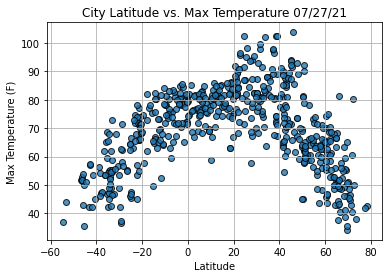

In [21]:
 #Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

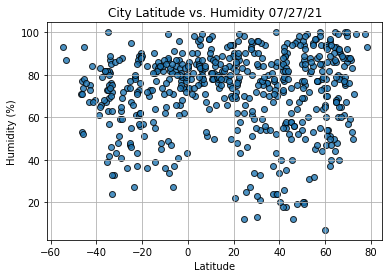

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

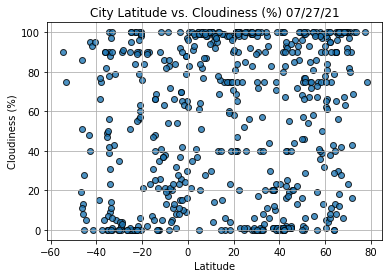

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

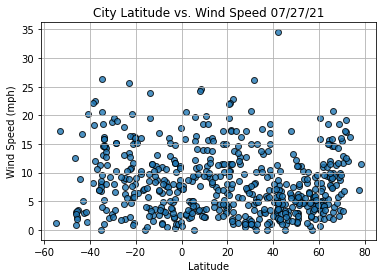

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()